In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances


In [18]:
data = np.load('/Users/mikolajmalec/Datasets/NQG.train.txt.target.sembeddings.all-MiniLM-L6-v2.npy')
data_text = np.genfromtxt('/Users/mikolajmalec/Datasets/NQG/data/redistribute/QG/train/train.txt.target.txt', 
                       dtype=str, delimiter='\n')

data = data[:10000]
print(data.shape)

(10000, 384)


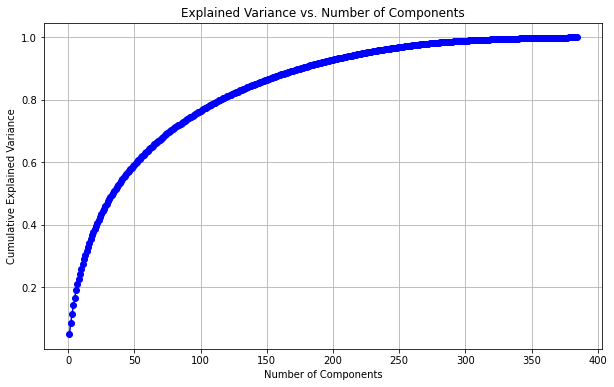

In [19]:
from sklearn.decomposition import PCA

# Fit PCA and transform the data
pca = PCA()
data_transformed = pca.fit_transform(data)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the variance explained by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

#########%#########

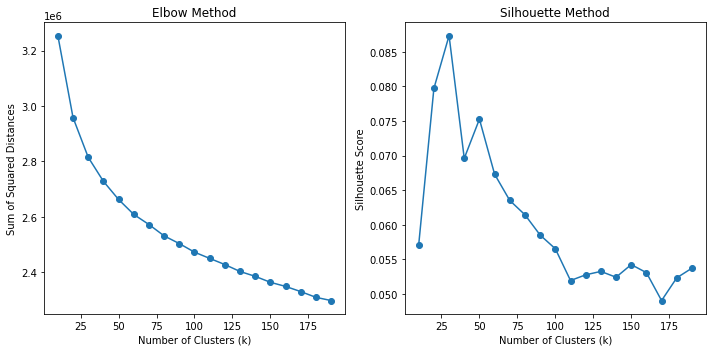

In [20]:
# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Calculate the sum of squared distances for different values of k
sse = []
silhouette_scores = []
possible_k_values = np.arange(10, 200, 10)

for k in possible_k_values:
    
    if k%100 > 0:
        print("#",end="")
    else:
        print("%",end="")
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_standardized)
    sse.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center
    silhouette_scores.append(silhouette_score(data_standardized, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(possible_k_values, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')

plt.subplot(1, 2, 2)
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [21]:
# Specify the number of clusters
num_clusters = 30

# Create a k-means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(data)

# Get the cluster labels for each vector
cluster_labels = kmeans.labels_

# Find the indices of data in the first cluster
first_cluster_indices = np.where(cluster_labels == 0)[0]

# Randomly select 10 indices from the first cluster
random_10_indices = np.random.choice(first_cluster_indices, size=10, replace=False)

# Retrieve the text data for the selected indices
selected_text_data = data_text[random_10_indices]

# Print the text data for the selected indices
for i, text in enumerate(selected_text_data):
    print(f"Index {random_10_indices[i]}: {text}")

Index 757: what is the name of beyoncé 's female tour band ?
Index 545: of what event was beyonce honorary chair ?
Index 591: when were beyonce and jay z married ?
Index 265: when did beyonce start becoming popular ?
Index 579: beyonce released the song `` formation '' on which online music service ?
Index 647: when did beyonce sign a letter for one campaign ?
Index 881: how many records has she sold with destiny 's child ?
Index 500: who did beyoncé perform privately for in 2011 ?
Index 865: what type of organism was named after beyonce in 2012 ?
Index 289: when did beyonce take a hiatus in her career and take control of her management ?


In [22]:
# Calculate pairwise Euclidean distances between data
distances = euclidean_distances(data, data)

# Set the diagonal values (distances to self) to a large number
np.fill_diagonal(distances, np.inf)

In [30]:
# Find the indices of pairs with a similarity smaller than 0.5
pairs_below_threshold = np.where(distances < 0.5)

# Create a list of pairs and their similarities
pairs_and_similarities = list(zip(pairs_below_threshold[0], pairs_below_threshold[1], distances[pairs_below_threshold]))

# Shuffle the pairs to get a random order
np.random.shuffle(pairs_and_similarities)

# Select random pairs with a similarity smaller than 1
num_random_pairs = 10
random_pairs = pairs_and_similarities[:num_random_pairs]

# Print the random pairs and their similarities
for i, (index1, index2, similarity) in enumerate(random_pairs):
    question1 = data_text[index1]
    question2 = data_text[index2]
    print(f"Pair {i + 1}:\nQuestion 1: '{question1}'\nQuestion 2: '{question2}'\nSimilarity: {np.round(similarity, 5)}\n")
    

Pair 1:
Question 1: 'when was the first fictionalized account of chopin 's life ?'
Question 2: 'where was the first fictionalized account of chopin 's life created ?'
Similarity: 0.2848300039768219

Pair 2:
Question 1: 'what teaching were criticized by nagarjuna ?'
Question 2: 'what teaching was criticized by nagarjuna ?'
Similarity: 0.08975999802350998

Pair 3:
Question 1: 'what was the name of beyoncé 's first solo album ?'
Question 2: 'what is the lead single on beyoncé 's first album ?'
Similarity: 0.49149999022483826

Pair 4:
Question 1: 'who did chopin go to berlin with ?'
Question 2: 'when did chopin visit berlin ?'
Similarity: 0.37755000591278076

Pair 5:
Question 1: 'what is the first period of buddhism called ?'
Question 2: 'what time period was the beginning of buddhism ?'
Similarity: 0.4652999937534332

Pair 6:
Question 1: 'how did the encyclopedia americana describe the yuan dynasty ?'
Question 2: 'how did the the columbia encyclopedia describe the yuan dynasty ?'
Similari

In [29]:
# Find the indices of pairs with a similarity smaller than 1
pairs_below_threshold = np.where(distances < 1)

# Create a list of pairs and their similarities
pairs_and_similarities = list(zip(pairs_below_threshold[0], pairs_below_threshold[1], distances[pairs_below_threshold]))

# Shuffle the pairs to get a random order
np.random.shuffle(pairs_and_similarities)

# Select random pairs with a similarity smaller than 1
num_random_pairs = 10
random_pairs = pairs_and_similarities[:num_random_pairs]

# Print the random pairs and their similarities
for i, (index1, index2, similarity) in enumerate(random_pairs):
    question1 = data_text[index1]
    question2 = data_text[index2]
    print(f"Pair {i + 1}:\nQuestion 1: '{question1}'\nQuestion 2: '{question2}'\nSimilarity: {np.round(similarity, 5)}\n")
    

Pair 1:
Question 1: 'what magazine rated beyonce as the most powerful female musician in 2015 ?'
Question 2: 'what about beyonce has influenced many entertainers ?'
Similarity: 0.8831899762153625

Pair 2:
Question 1: 'how many votes were cast in the american idol finale in season eight ?'
Question 2: 'who was a host on all seasons of american idol ?'
Similarity: 0.967989981174469

Pair 3:
Question 1: 'during what years was theodor hesburgh president of notre dame ?'
Question 2: 'how large is notre dame in acres ?'
Similarity: 0.9702200293540955

Pair 4:
Question 1: 'what did beyoncé name her daughter ?'
Question 2: 'after leaving destiny 's child , how many records did beyoncé release under her own name ?'
Similarity: 0.762660026550293

Pair 5:
Question 1: 'how much money was spent on enhancing notre dame stadium under john jenkins ?'
Question 2: 'what is the grotto at notre dame ?'
Similarity: 0.9945999979972839

Pair 6:
Question 1: 'spanish songs beyonce released were for what ?'
Que